# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Importing the categorical variables encoded dataset 

In [2]:
data = pd.read_csv('Metro-Interstate-Traffic-Volume-Encoded.csv')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [4]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

The test size is taken as 25%

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

# Modeling - Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
pred = LR.predict(xtest)

### Evaluation Metrics

In [11]:
import sklearn.metrics as metrics

In [12]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.14054327143656553


In [13]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  1615.792643919203


In [14]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  3355289.823297635


In [15]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1831.7450213655925


## Inference:
    By fitting all the features in the model we have got only 14% R squared.

    From the score we can get the inference that only 14 percent of the variation is reduced by including all the features in the model.

# Forward Selection

    Lets proceed with the forward selection to get which feature is more important for the traffic_volume Prediction
    In each iteration, we add one more feature and find the score till an addition of a new variable does not improve the performance of the model.

### Creating a GRID search to find the best single feature

In [16]:
for i in range(len(data.columns)-1):
    X=  data[[data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

holiday :  0.0006
temp :  0.0192
rain_1h :  -0.0
snow_1h :  -0.0001
Year :  -0.0002
Month :  0.0
Day :  -0.0001
Hour :  0.1278
weather_main :  0.0002
weather_description :  0.0041


From the above R squared score only two feature temp and Hour is the only feature which has better score. so we add these two features as the base and proceed with other features.

In [17]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1378
temp 0.1376
rain_1h 0.1376
snow_1h 0.1375
Year 0.1376
Month 0.1385
Day 0.1376
Hour 0.1376
weather_main 0.1373
weather_description 0.1398


The next highest score is for weather_description so we will include it in the next iteration

In [18]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.1398
rain_1h 0.1399
snow_1h 0.1397
Year 0.1395
Month 0.1408
Day 0.1398
Hour 0.1398
weather_main 0.1397
weather_description 0.1398


The next highest score is for Holiday so we will include it in the next iteration

In [19]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description','holiday',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.14
rain_1h 0.1401
snow_1h 0.1399
Year 0.1397
Month 0.1409
Day 0.14
Hour 0.14
weather_main 0.1399
weather_description 0.14


# Inference:

    We have attained the R squared score of the base model which includes all the features.
    So from this we can say that only 4 features are enough for the prediction.
    These 4 features ['temp','Hour','weather_description','holiday'] have contributed the 100% for 14% variation of dependent variable

# Polynomial Transformation

To understand the need for polynomial regression, we will see the scatter plot of the residuals

In [20]:
import matplotlib.pyplot as plt 

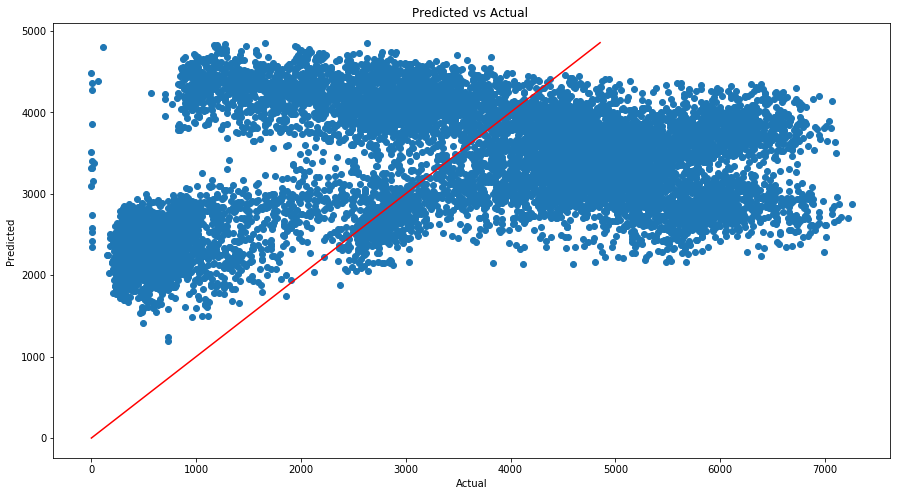

In [21]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting.

To overcome under-fitting, we need to increase the complexity of the model.
To generate a higher order equation we can add powers of the original features as new features.the curve that we are fitting is quadratic in nature.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
pf = PolynomialFeatures(degree=2)

In [24]:
data1 = data.copy()

In [25]:
X = data1.drop('traffic_volume',axis=1)
Y= data1['traffic_volume']

### Transforming the data

In [26]:
X = pf.fit_transform(X)

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [28]:
LR = LinearRegression()

In [29]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
pred = LR.predict(xtest)

In [31]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.6566242906810378


In [32]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  893.3409605657207


In [33]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  1340527.085024136


In [34]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1157.8113339504566


## We can see now the R squared has increased and it is 65 percent which indicates that 65 percent of variation is reduced after transforming the data to polynomial regression

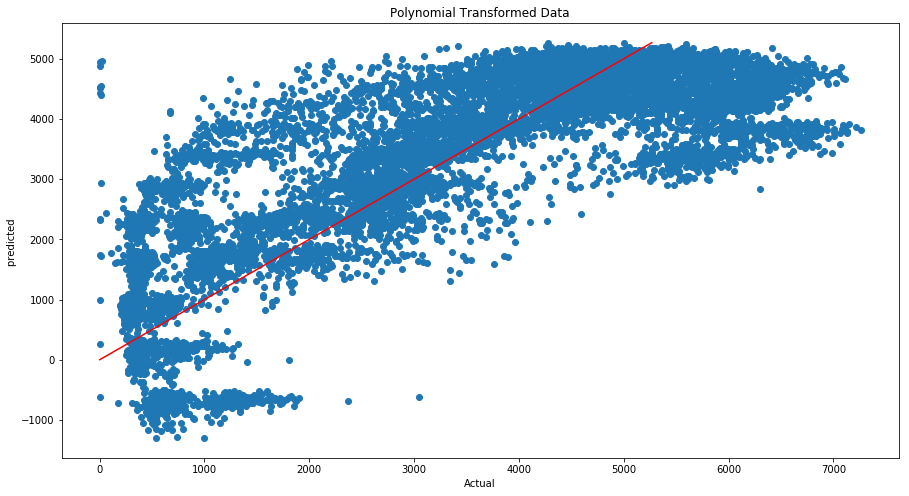

In [35]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Polynomial Transformed Data')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()

# we can see that still the line is not a best fit but it is more better than the original data. Transformed data has given a better performance thanthe original one.